# Vježbe 2 - drugi dio
Na predavanju smo radili algoritam perceptrona. 

- Ponavljanje
- Zadatak: Pomoću perceptrona implementirajte logičke OR, AND, XOR
- Ugrađena klasa Perceptron iz sklearn
    - Primjer 1
    - Primjer 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron

---
## Ponavljanje
---
- Želimo pronaći hiperravnivnu koja razdvaja podatke. <br>
- U ovom slučaju (kojeg možemo vizualizirati) kada imamo podatke koji su iz $\mathbb{R}^2$  tražimo pravac koji razdvaja podatke
- Taj pravac je definiran parametrima koje nazivamo $\theta$, u ovom slučaju kada imamo podatke iz $\mathbb{R}^2$ $\theta$ je zapravo $\theta = [\theta_1 \theta_2]$
- $\theta$ je normala na taj pravac koji separira podatke

- Svaki podatak ima oznaku 1 ili -1
- Ako se podatak nalazi iznad pravca ima oznaku 1, u suprotnom -1



Pokažimo to na primjeru

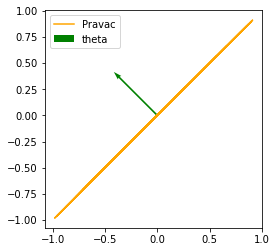

In [6]:
# Uzmimo jedan jednostavan primjer za theta i nacrtajmo ga
theta2 = 1
theta1 = -1
theta = np.array([theta1,theta2])


# Generirajmo 50 slucajnih tocki iz uniforme distribucije 
xx = np.random.uniform(-1,1,(50,1))
# Zelimo da tocke leže na pravcu kojem je theta normala
# To znači da želimo da je theta.T.dot(x) = 0 tj. [theta1 theta2] * [x1;x2] = 0
# Iz čega slijedi x2 = -(theta1/theta2)* x1 
yy = -xx*(theta1/theta2)

# Pogledajmo prethodni izraz: yy = -xx*(theta1/theta2), znamo kako je theta1/theta2 = -1/1 = -1, pa je yy = --xx = xx tj. pravac y=x

# Nacrtajmo sada te podatke
plt.plot(xx,yy, color='orange', label='Pravac')

# Nacrtajmo vektor normalne theta
plt.quiver(*[0,0], *theta, color=['green'], scale=5, label='theta')

plt.legend()
plt.gca().set_aspect('equal')  
plt.show()

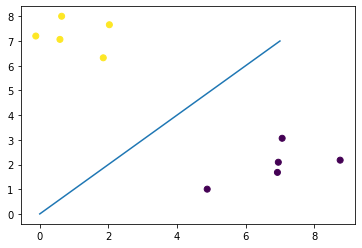

In [13]:
## Pokažimo još jedan primjer
## 1. Podaci
X,y = make_blobs(n_samples=10, n_features=2, centers=[[1,7],[7,2]])
y = [1 if i == 0 else -i for i in y]
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(np.arange(0,8), np.arange(0,8))
plt.show()

In [ ]:
# Prođimo kroz podatke i pogledajmo gdje se nalaze s obzirom na pravac određen thetom
theta = np.array([-1,1])
for i,x in enumerate(X):
    print('predikcija: ', x.dot(theta), ' oznaka: ', y[i])

---
## Zadatak:
Pomoću perceptrona implementirajte logičke OR, AND, XOR

---

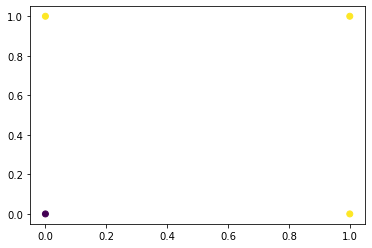

In [28]:
# OR
X = np.array([[0,0],[0,1],[1,0], [1,1]])
y = np.array([-1,1,1,1])
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

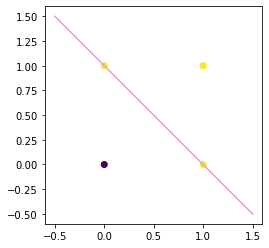

In [40]:
theta = np.array([1,1,1])
#plt.quiver(*[0,0], *theta, color=['green'], scale=5, label='theta')
plt.plot(np.arange(-0.5,2), (-theta[1]/theta[2]*np.arange(-0.5,2) + theta[0]), color='plum')
plt.scatter(X[:,0], X[:,1], c=y)
plt.gca().set_aspect('equal')  
plt.show()

In [ ]:
# AND
X = np.array([[0,0],[0,1],[1,0], [1,1]])
y = np.array([-1,-1,-1,1])
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

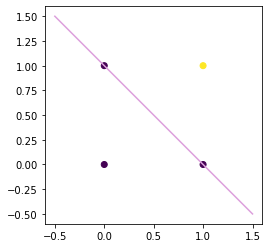

In [42]:
theta = np.array([1,1,1])
#plt.quiver(*[0,0], *theta, color=['green'], scale=5, label='theta')
plt.plot(np.arange(-0.5,2), (-theta[1]/theta[2]*np.arange(-0.5,2) + theta[0]), color='plum')
plt.scatter(X[:,0], X[:,1], c=y)
plt.gca().set_aspect('equal')  
plt.show()

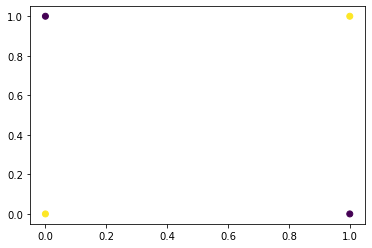

In [43]:
# XOR
X = np.array([[0,0],[0,1],[1,0], [1,1]])
y = np.array([1,-1,-1,1])
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

---
## Ugrađena klasa Perceptron u sklearn
---
class sklearn.linear_model.Perceptron() 

Model perceptrona je implementiran kao klasa. Prilikom instanciranja možemo postaviti sljedeće parametre:
- penalty: definira regularizaciju koja će se dodati (više o tome kasnije na predavanjima)
    - zadano: None
    - izbor: l2,l1,elasticnet
- alpha: veže se za regularizaciju gore spomenutu
    - zadano: 0.0001
    - float
- fit_intercept: definira dodajemo li pomak ili ne
    - zadano:True    
- max_iter: zadano: 1000
- tol: kriterij zaustavljanja
    - zadano: 0.001
- shuffle: definira treba li ili ne skup podataka za treniranje biti izmiješan nakon svake epohe
    - zadano: True

Možemo pozvati sljedeće metode:
- fit() za treniranje
- predict(X) za računanje predikcija
- score(X,y) za računanje predikcija i usporedbu sa y

I sljedeće atribute:
- coef_ vraća naternirate težine
- intercept_ vraća natreniranu težinu uz pomak
- n_iter_int vraća broj iteracija koji se izvrtio prije nego je algoritam završio
- t_int vraća broj ažuriranja težina tijekom izvršavanja algortima

### Primjer 1.

Linearno separabilni podaci kroz ishodiše

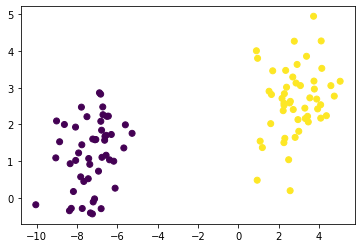

In [25]:
## 1. Podaci
X,y = make_blobs(n_samples=100, n_features=2, centers=2)
y = np.array([-1 if i ==0 else 1 for i in y])
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [26]:
## 2. Model
perc = Perceptron(fit_intercept = False)
perc.fit(X,y)
print(perc.coef_, perc.intercept_)

[[2.77197487 4.26814791]] [0.]


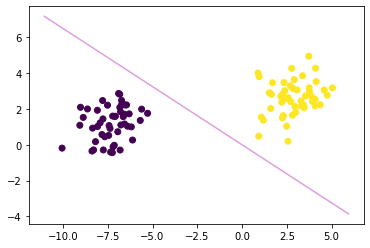

In [27]:
## 3. Grafički prikaz
x = np.arange(np.min(X)-1, np.max(X)+1)
plt.scatter(X[:,0], X[:,1], c = y)
plt.plot(x, (-perc.coef_[0][0]/perc.coef_[0][1])*x, color='plum')
plt.show()

### Primjer 2.

Linearno neseparabilni podaci

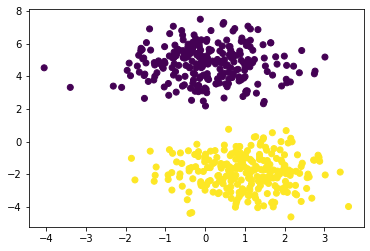

In [45]:
## 1. Podaci
X,y = make_blobs(n_samples=500, n_features=2, centers=2)
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [37]:
## 2. Model
perc = Perceptron(fit_intercept = False)
perc.fit(X,y)
print(perc.coef_, perc.intercept_)

[[-3.70377672  9.65358879]] [0.]


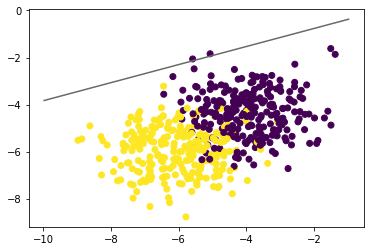

In [39]:
## 3. Grafički prikaz
x = np.arange(np.min(X)-1, np.max(X)+1)
plt.scatter(X[:,0], X[:,1], c = y)
plt.plot(x, (-perc.coef_[0][0]/perc.coef_[0][1])*x, color='dimgrey')
plt.show()

In [40]:
## 4. Ocjena modela
perc.score(X,y)

0.496